In [ ]:
# 문장토큰화  sent_tokenize
# 기본로직
    # 마침표,느낌표, 물음표를 문장 끝 후보로 인식
    # 약어 패턴 학습(Dr, Mr ,U.S.A 등)
    # 대문자로 시작하는지
    # 통계적 모델을 사용해 진짜 문장 경계인지 판단
# 다국어
# 약어와 실제 문장끝을 구분하는 기계학습 모델 내장

# 단어 토큰화 word_tokenization
    # 규칙기반
    # 공백기준 단어분리
    # 구두점을 별도 토큰으로 분리
    # 축약형 처리 it's  it, s
    # 소유격 처리 "Let's"  Let s

    #구두점기반  WordPunctTokenizer
    # 모든 구두점을 분리
    # It's  It, ', s

    # 정규표현식  RegexpTokenizer

# 노이즈와 불용어 제거 
    # set자료구조 : 중복제거
    # List Comprehension : 필터링
    # NLTK 불용어사전

In [ ]:
# %conda install nltk

In [ ]:
from nltk.tokenize import sent_tokenize
import nltk

In [ ]:
nltk.download('wordnet')
nltk.download('webtext')
nltk.download('stopwords')
nltk.download('punkt_tab')

In [ ]:
sentence = "Hello everyone. It's good to see you. Let's start our text mining class"
sent_tokenize(sentence)

In [ ]:
sentence_kor = '안녕하세요, 여러분. 만나서 반갑습니다. 이제 학습을 시작해볼까요?'
sent_tokenize(sentence_kor)

In [ ]:
from nltk.tokenize import word_tokenize
word_tokenize(sentence_kor)

In [ ]:
from nltk.tokenize import WordPunctTokenizer
WordPunctTokenizer().tokenize(sentence)

In [ ]:
# 정규식토큰화
import re
re.findall("[abc]", "how are you, boy")

In [ ]:
# 노이즈와 불용어 제거
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
english_stops = stopwords.words('english')
test1 = "Sorry, I couldn't go to movie yesterday"
# tokens = word_tokenize(test1)
tokenizer = RegexpTokenizer("[\\w]+")
tokens = tokenizer.tokenize(test1.lower())

[token for token in tokens if token not in english_stops]

In [ ]:
# 소문자 a~z로 이루어진 문자열에서 4글자이상
RegexpTokenizer("[a-z]{4,}")

RegexpTokenizer("[\\w]{3,}") # 3글자 이상

RegexpTokenizer("[\\w]") # 어포스트로피를 패턴에서 제외 can't can t

In [ ]:
# 어간 추출(Stemming)
# 줄기 stem  단어에서 불필용한 요소를 제거하고 남는 핵심형태
# 단어는 다양한 형태가 있음, 복수형 과거형 과 같은 시제변환, 복수형
# 단어를 통일
    # walk(걷다)  walks walking walked --> 어간 walk
    # 먹는다, 사랑해, 책을 
    # 먹는다 먹었다... '먹-'으로 묶어서 컴퓨터가 같은 단어로 인식

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stemmer.stem('cooking'), stemmer.stem('cookery'), stemmer.stem('cookbooks')


In [ ]:
# PorterStemmer 규칙기반이라서 완벽하지 못함 --> 속도가 빠름, 의미가 달라질수 도 있음

In [ ]:
from nltk.stem import LancasterStemmer # 더 많은 규칙이 적용.. 과도한 축약 위험
stemmer = LancasterStemmer()
stemmer.stem('cooking'), stemmer.stem('cookery'), stemmer.stem('cookbooks')

In [ ]:
# 표제어 추출 Lemmatization
# Lemma 단어의 사전 기본형
# 단어의 변형(시제,복수,비교급) 제거하고 사전(headword)에 나오는 정확한 원형으로 바꾸는 과정
# 어간처럼 단어줄기가 아니라, 맥락과 품사를 고려한 올바른 형태
# better(더 좋은) -> 표제어 good(좋은)
# 먹었다 -> 먹다(동사 원형)
# 알고리즘 : 형태소 분석기(konlpy)를 사용해 품사(명사, 동사)를 보고 정확히 변환

In [ ]:
# 주요 목적
    # 어간추출은 대충 줄이지 않고 맥락에 맞는 정확한 단어로 만들어서 NLP 품질 향상
    # 단점  사전에 의존해서 언어/맥락 제한

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize('cooking'))  # 기본이 명사로 인식
print(lemmatizer.lemmatize('cooking', pos='v'))  # 품사를 동사(v)

In [ ]:
# n noun(명사)
# v verb(동사)
# a adjective(형용사)
# r averb(부사)

In [ ]:
lemmatizer.lemmatize('better', pos='a')

In [ ]:
# 품사 태깅
import nltk
from nltk.tokenize import word_tokenize
nltk.download('averaged_perceptron_tagger_eng')

tokens = "hello everyone. It's good to see you. Let's start out text mining class!"
tokens = word_tokenize(tokens)
nltk.pos_tag(tokens)

In [ ]:
# 품사 태그 정보 확인
nltk.download('tagsets_json')
nltk.help.upenn_tagset('VB')  # 명사 동사 형용사

In [ ]:
# 특정 품사 추출  명사 동사 형용사
tag_lists = ['NN','VB','JJ']
[word for word, tag in nltk.pos_tag(tokens) if tag in tag_lists]

In [ ]:
# NLTK는 영어기반  한국어의 조사분리 불가능, 어미변화처리 불가능
# KoNlpy Okt 사용 해결

In [ ]:
# %conda install konlpy
# %pip install konlpy
# %pip install JPypel


In [ ]:
from konlpy.tag import Okt
t = Okt()

In [ ]:
sentence = '''절망의 반대가 희망은 아니다.
어두운 밤하늘에 별이 빛나듯
희망은 절망 속에 싹트는 거지
만약에 우리가 희망함이 적다면
그 누가 세상을 비출어줄까.
정희성, 희망 공부'''
tokens = word_tokenize(sentence)
print(tokens)
print(nltk.pos_tag(tokens))

In [ ]:
# NLP 고유명사.. 대부분 고유명사로 잘못 인식
from konlpy.tag import Okt
t = Okt()
print(f'형태소 : {t.morphs(sentence)}')
print(f'명사 : {t.nouns(sentence)}')
print(f'풍사태깅 : {t.pos(sentence)}')

In [ ]:
# 그래프와 워드클라우드
import nltk
nltk.download('gutenberg')
from nltk.corpus import gutenberg  # 구탠버그 말뭉치중에서 이상한나라의 엘리스 텍스트 코드
gutenberg.fileids
doc_alice = gutenberg.open('carroll-alice.txt').read()
print(doc_alice)

In [37]:
from nltk.tokenize import word_tokenize, RegexpTokenizer
tokens_alice = word_tokenize(doc_alice)
print(len(tokens_alice))

tokenizer = RegexpTokenizer("[\\w']{3,}")
reg_alice = tokenizer.tokenize(doc_alice.lower())
print(len(reg_alice))

33535
21616


In [ ]:
# 3. 불용어 제거
from nltk.corpus import stopwords
english_stops = set(stopwords.words('english'))
result_alice = [ word for word in reg_alice if word not in english_stops ]
len(result_alice)

12871

In [39]:
# 4. 품사 태깅 및 필터링 (명사 동사 형용사만)
my_tag_set = ['NN', 'VB', 'VBD', 'JJ']
my_word = [word for word, tag in nltk.pos_tag(reg_alice) if tag in my_tag_set]

In [42]:
from collections import Counter
sorted_word_count = dict( Counter(my_word) )

In [ ]:
# %conda install wordcloud

3 channel Terms of Service accepted
Channels:
 - defaults
Platform: win-64
Solving environment: done

## Package Plan ##

  environment location: c:\Users\playdata2\miniconda3\envs\deep

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wordcloud-1.9.4            |  py311h827c3e9_0         326 KB
    ------------------------------------------------------------
                                           Total:         326 KB

The following NEW packages will be INSTALLED:

  wordcloud          pkgs/main/win-64::wordcloud-1.9.4-py311h827c3e9_0 



wordcloud-1.9.4      | 326 KB    |            |   0% 
wordcloud-1.9.4      | 326 KB    | ########3  |  83% 
wordcloud-1.9.4      | 326 KB    | ########## | 100% 
wordcloud-1.9.4      | 326 KB    | ########## | 100% 
                                                     
 done
Preparing transaction: done
Veri

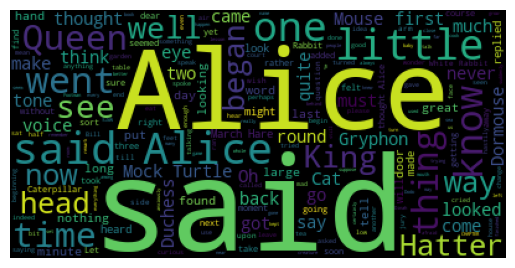

In [44]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud().generate(doc_alice)
plt.axis('off')
plt.imshow(wordcloud)

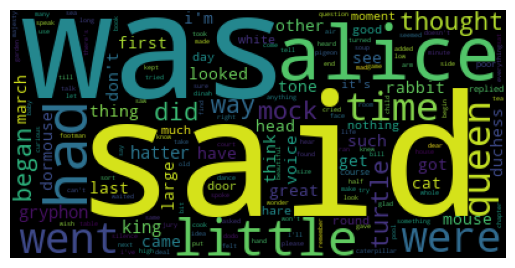

In [46]:
wc = wordcloud.generate_from_frequencies(sorted_word_count)
plt.axis('off')
plt.imshow(wc)